In [1]:
import pycaret
pycaret.__version__

'3.1.0'

In [2]:
from pycaret.datasets import get_data
data = get_data('hour')
# Feature Engineering
data = data.drop(['instant', 'casual', 'registered'], axis=1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
print(data)

           dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0      2011-01-01       1   0     1   0        0        6           0   
1      2011-01-01       1   0     1   1        0        6           0   
2      2011-01-01       1   0     1   2        0        6           0   
3      2011-01-01       1   0     1   3        0        6           0   
4      2011-01-01       1   0     1   4        0        6           0   
...           ...     ...  ..   ...  ..      ...      ...         ...   
17374  2012-12-31       1   1    12  19        0        1           1   
17375  2012-12-31       1   1    12  20        0        1           1   
17376  2012-12-31       1   1    12  21        0        1           1   
17377  2012-12-31       1   1    12  22        0        1           1   
17378  2012-12-31       1   1    12  23        0        1           1   

       weathersit  temp   atemp   hum  windspeed  cnt  
0               1  0.24  0.2879  0.81     0.0000   16  
1          

In [4]:
from pycaret.regression import *
s = setup(data, target = 'cnt', session_id = 123)

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 14)"
4,Transformed data shape,"(17379, 14)"
5,Transformed train set shape,"(12165, 14)"
6,Transformed test set shape,"(5214, 14)"
7,Numeric features,12
8,Categorical features,1
9,Preprocess,True


In [5]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,25.8207,1826.0388,42.6504,0.9441,0.3311,0.3043,0.2060
lightgbm,Light Gradient Boosting Machine,27.6045,1909.0435,43.6187,0.9416,0.4149,0.4082,0.4670
rf,Random Forest Regressor,28.0836,2151.3062,46.3052,0.9341,0.3515,0.3258,0.2840
dt,Decision Tree Regressor,36.6387,3749.6989,61.0902,0.8852,0.4458,0.3877,0.0120
gbr,Gradient Boosting Regressor,47.1176,4909.0988,69.9842,0.8497,0.6393,0.8792,0.0990
knn,K Neighbors Regressor,52.8224,6923.7366,83.1336,0.7880,0.6030,0.7981,0.0090
ada,AdaBoost Regressor,87.2097,11665.8260,107.9778,0.6419,1.0522,2.6155,0.0630
ridge,Ridge Regression,107.0856,20625.4342,143.5720,0.3680,1.2301,3.5176,0.0850
lar,Least Angle Regression,107.0824,20622.9995,143.5634,0.3680,1.2304,3.5171,0.0070
lr,Linear Regression,107.0824,20622.9995,143.5634,0.3680,1.2304,3.5171,0.1710


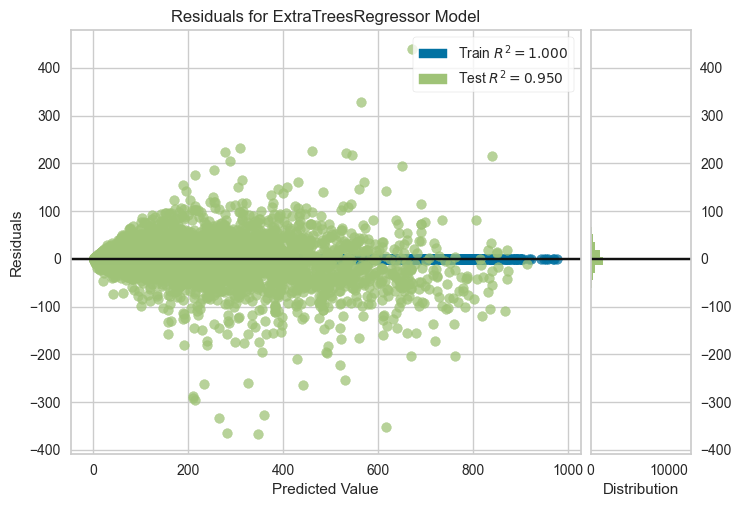

In [6]:
plot_model(best, plot = 'residuals')

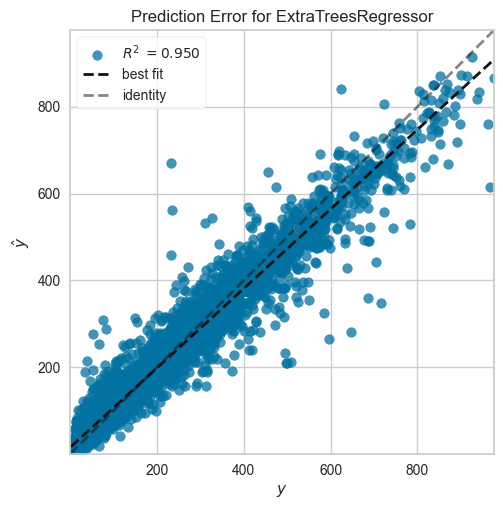

In [7]:
# plot error
plot_model(best, plot = 'error')

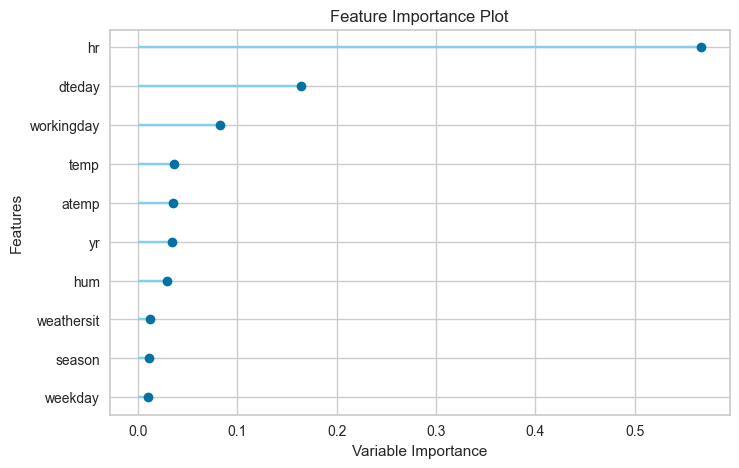

In [8]:
# plot feature importance
plot_model(best, plot = 'feature')


In [9]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,24.5785,1663.1351,40.7816,0.9502,0.3157,0.2888


In [11]:

new_data = data.copy()
new_data.drop('cnt', axis=1, inplace=True)
new_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [12]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,prediction_label
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1.0


In [13]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                              'holiday', 'weekday', 'workingday',
                                              'weathersit', 'temp', 'atemp',
                                              'hum', 'windspeed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['dteday'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['dteday'],
                                     transformer=TargetEncoder(cols=['dteday'],
                                                               handle_missing='return_nan'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_sta

In [14]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/s_/3j5kpqgn7ybf3sfmb0z2rv8h0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                             'holiday', 'weekday', 'workingday',
                                             'weathersit', 'temp', 'atemp',
                                             'hum', 'windspeed'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['dteday'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('rest_encoding',
                 TransformerWrapper(include=['dteday'],
                                    transformer=TargetEncoder(cols=['dteday'],
                                                              handle_missing='return_nan'))),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

In [15]:
s = setup(data, target = 'cnt', session_id = 123)

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 14)"
4,Transformed data shape,"(17379, 14)"
5,Transformed train set shape,"(12165, 14)"
6,Transformed test set shape,"(5214, 14)"
7,Numeric features,12
8,Categorical features,1
9,Preprocess,True


In [16]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [17]:
# lets access X_train_transformed
get_config('X_train_transformed')

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
1859,140.787433,2.0,0.0,3.0,6.0,0.0,3.0,1.0,2.0,0.34,0.3182,0.87,0.2537
7302,171.259781,4.0,0.0,11.0,21.0,0.0,6.0,0.0,1.0,0.32,0.3485,0.66,0.0000
17094,181.530950,4.0,1.0,12.0,1.0,0.0,4.0,1.0,1.0,0.32,0.3485,0.66,0.0000
17009,172.727704,4.0,1.0,12.0,12.0,0.0,0.0,0.0,2.0,0.38,0.3939,0.82,0.1940
1636,148.643823,1.0,0.0,3.0,17.0,0.0,0.0,0.0,1.0,0.44,0.4394,0.41,0.3582
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,130.712433,1.0,0.0,1.0,5.0,0.0,3.0,1.0,1.0,0.22,0.2273,0.47,0.1642
13435,239.976981,3.0,1.0,7.0,0.0,0.0,4.0,1.0,1.0,0.74,0.6970,0.66,0.0896
7763,163.323260,4.0,0.0,11.0,2.0,0.0,5.0,1.0,1.0,0.28,0.2879,0.81,0.1045
15377,175.612433,4.0,1.0,10.0,22.0,0.0,0.0,0.0,1.0,0.38,0.3939,0.87,0.1343


In [19]:
# init setup with normalize = True
s = setup(data, target = 'cnt', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 14)"
4,Transformed data shape,"(17379, 14)"
5,Transformed train set shape,"(12165, 14)"
6,Transformed test set shape,"(5214, 14)"
7,Numeric features,12
8,Categorical features,1
9,Preprocess,True


In [20]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,25.8207,1826.2869,42.6537,0.9441,0.3312,0.3043,0.2140
lightgbm,Light Gradient Boosting Machine,27.5204,1905.6360,43.5901,0.9416,0.4114,0.4053,0.4850
rf,Random Forest Regressor,28.0896,2151.8848,46.3107,0.9341,0.3517,0.3261,0.2920
dt,Decision Tree Regressor,36.6251,3760.0257,61.1612,0.8849,0.4456,0.3877,0.0130
gbr,Gradient Boosting Regressor,47.1176,4909.0988,69.9842,0.8497,0.6393,0.8792,0.1020
knn,K Neighbors Regressor,70.2381,11471.5704,107.0292,0.6489,0.8639,1.7425,0.0140
ada,AdaBoost Regressor,87.2097,11665.8260,107.9778,0.6419,1.0522,2.6155,0.0590
br,Bayesian Ridge,107.0420,20609.6575,143.5170,0.3684,1.2299,3.5161,0.0080
ridge,Ridge Regression,107.0546,20613.7703,143.5313,0.3683,1.2300,3.5165,0.0090
lr,Linear Regression,107.0824,20622.9995,143.5634,0.3680,1.2304,3.5171,0.0100


In [21]:
from pycaret.regression import setup, tune_model
s = setup(data, target='cnt', session_id=123)


,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 14)"
4,Transformed data shape,"(17379, 14)"
5,Transformed train set shape,"(12165, 14)"
6,Transformed test set shape,"(5214, 14)"
7,Numeric features,12
8,Categorical features,1
9,Preprocess,True


In [22]:
et_model = create_model('et')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25.6093,1680.8625,40.9983,0.9464,0.3124,0.2822
1,25.6317,1670.0833,40.8667,0.9499,0.3316,0.3032
2,26.4545,2132.5358,46.1794,0.9362,0.3350,0.3251
3,26.0080,1884.0931,43.4061,0.9432,0.3301,0.3063
4,23.9064,1414.7367,37.6130,0.9521,0.3341,0.3104
5,24.7364,1669.0014,40.8534,0.9480,0.3162,0.2785
6,27.4450,2047.6184,45.2506,0.9391,0.3267,0.2952
7,24.5721,1682.9848,41.0242,0.9523,0.3388,0.3076
8,26.5262,2001.3196,44.7361,0.9371,0.3429,0.3091


In [23]:
tuned_et = tune_model(et_model, optimize = 'R2')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,42.5320,4199.0480,64.8001,0.8660,0.4435,0.4995
1,44.3719,4685.6846,68.4521,0.8595,0.4724,0.5417
2,42.0074,4526.2674,67.2775,0.8645,0.4636,0.5522
3,44.4040,4798.4557,69.2709,0.8554,0.4548,0.5124
4,39.2206,3689.3524,60.7400,0.8752,0.4712,0.5530
5,42.5908,4546.9852,67.4313,0.8585,0.4696,0.5375
6,46.0329,5023.1200,70.8740,0.8506,0.4672,0.5287
7,40.1654,4172.6929,64.5964,0.8816,0.4711,0.5428
8,44.8450,4879.4878,69.8533,0.8467,0.4937,0.5755


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [24]:
from pycaret.regression import create_model
et_baseline = create_model('et')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25.6093,1680.8625,40.9983,0.9464,0.3124,0.2822
1,25.6317,1670.0833,40.8667,0.9499,0.3316,0.3032
2,26.4545,2132.5358,46.1794,0.9362,0.3350,0.3251
3,26.0080,1884.0931,43.4061,0.9432,0.3301,0.3063
4,23.9064,1414.7367,37.6130,0.9521,0.3341,0.3104
5,24.7364,1669.0014,40.8534,0.9480,0.3162,0.2785
6,27.4450,2047.6184,45.2506,0.9391,0.3267,0.2952
7,24.5721,1682.9848,41.0242,0.9523,0.3388,0.3076
8,26.5262,2001.3196,44.7361,0.9371,0.3429,0.3091


In [25]:
tuned_et_custom = tune_model(et_baseline, n_iter=50, custom_grid={
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
})


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,25.6308,1670.8656,40.8762,0.9467,0.3128,0.2840
1,25.6004,1684.8799,41.0473,0.9495,0.3389,0.3100
2,26.3441,2071.6447,45.5153,0.9380,0.3308,0.3185
3,25.8919,1851.7060,43.0315,0.9442,0.3312,0.3088
4,23.3862,1358.2874,36.8550,0.9540,0.3306,0.3051
5,24.7013,1680.3239,40.9918,0.9477,0.3123,0.2732
6,27.2047,1995.5159,44.6712,0.9406,0.3270,0.2979
7,24.3659,1660.4360,40.7484,0.9529,0.3376,0.3088
8,26.3490,1947.0410,44.1253,0.9388,0.3411,0.3084


Fitting 10 folds for each of 27 candidates, totalling 270 fits


In [26]:
from pycaret.regression import pull
et_baseline_results = pull()
tuned_et_custom_results = pull()


In [27]:
from pycaret.regression import finalize_model, save_model
final_model = finalize_model(tuned_et_custom)
save_model(final_model, 'tuned_et_custom')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                              'holiday', 'weekday', 'workingday',
                                              'weathersit', 'temp', 'atemp',
                                              'hum', 'windspeed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['dteday'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('rest_encoding',
                  TransformerWrapper(include=['dteday'],
                                     transformer=TargetEncoder(cols=['dteday'],
                                                               handle_missing='return_nan'))),
                 ('actual_estimator',
                  ExtraTreesRegressor(max_depth=20, n_es

In [28]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
import pandas as pd

#converting 'dteday'
data['dteday'] = pd.to_datetime(data['dteday'])

data['year'] = data['dteday'].dt.year
data['month'] = data['dteday'].dt.month
data['day'] = data['dteday'].dt.day
data = data.drop('dteday', axis=1)

X = data.drop('cnt', axis=1)  # Features
y = data['cnt']               # Target variable




#TimeSeriesSplit cross-validator
tscv = TimeSeriesSplit(n_splits=100)  # You can adjust n_splits based on your dataset size

scores = cross_val_score(tuned_et_custom, X, y, cv=tscv, scoring='r2')

#Results
print("R² scores for each split:", scores)
print("Average R² score:", scores.mean())


R² scores for each split: [ 0.77539685  0.85043586  0.81396682  0.84604907  0.92693913  0.78099548
  0.74531229  0.8876472   0.8475008   0.82706339  0.88098507  0.81997256
  0.80908285  0.79335616  0.74789176  0.75807731  0.86144198  0.87830766
  0.90381091  0.9323244   0.93937581  0.92637417  0.93899388  0.94538502
  0.85301649  0.94241301  0.7748022   0.9601039   0.91653683  0.93425805
  0.91525277  0.77218214  0.90646739  0.88402559  0.87114619  0.79879158
  0.92750878  0.93996397  0.91045317  0.92707394  0.88476229  0.95341083
  0.90329901  0.82508061  0.61600791  0.89694759  0.94271103  0.89649907
 -0.28012966  0.59217622  0.70600273  0.83988319  0.84921963  0.82146178
  0.88239632  0.91753691  0.93110042  0.85926347  0.92109117  0.76766535
  0.8463892   0.8322152   0.90453581  0.89788135  0.76740542  0.95541691
  0.93358553  0.87428511  0.94229872  0.85992936  0.92384018  0.93851899
  0.96464133  0.92755573  0.91552183  0.84877767  0.93303349  0.89890066
  0.95827749  0.95516689 